In [1]:
import pandas as pd

## Customer Interactions

In [2]:
df = pd.read_csv('customer_interactions.csv')
df

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110
...,...,...,...
95,96,22,103
96,97,26,87
97,98,29,102
98,99,17,110


Let's start by checking for missing values.

In [3]:
missing_values = df.isnull().sum()
missing_values

customer_id    0
page_views     0
time_spent     0
dtype: int64

There are no missing values in the dataset, which simplifies our preprocessing steps.

Outliers can be detected using various methods; one common approach is to look for values that fall outside of the Interquartile Range (IQR). Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are typically considered outliers, where Q1 and Q3 are the 25th and 75th percentiles, respectively. 

In [4]:
# Calculate the IQR for page_views and time_spent
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Display the outliers
outlier_data = df[outliers]
outlier_data.head(), outlier_data.shape

(Empty DataFrame
 Columns: [customer_id, page_views, time_spent]
 Index: [],
 (0, 3))

It appears that there are no outliers in the dataset according to the IQR method.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Descriptive statistics
df.describe()

,customer_id,page_views,time_spent
count,100.000000,100.000000,100.00000
mean,50.500000,21.770000,110.67000
std,29.011492,4.581154,21.56365
min,1.000000,15.000000,80.00000
25%,25.750000,18.000000,91.50000
50%,50.500000,22.000000,108.50000
75%,75.250000,25.000000,130.00000
max,100.000000,30.000000,150.00000


- **The average number of page views per customer** is approximately 21.77, with a standard deviation of about 4.58. This indicates a moderate level of variability in the number of page views among customers.

- **The average time spent by customers** is around 110 minutes, with a standard deviation of 21.56 minutes. This suggests that there's some variation in how long different customers engage with the content.

Text(0.5, 1.0, 'Distribution of Time Spent')

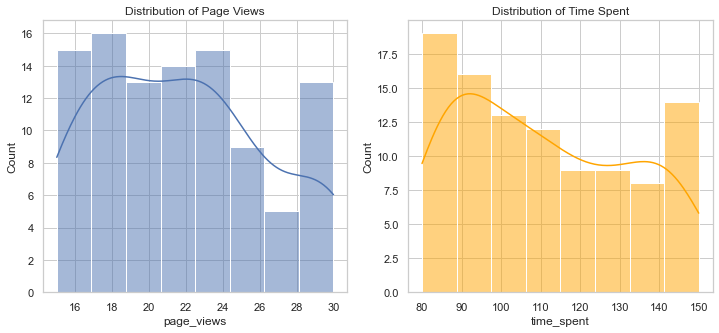

In [7]:
# Visualization setup
sns.set(style="whitegrid")

# Distribution plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['page_views'], kde=True)
plt.title('Distribution of Page Views')

plt.subplot(1, 2, 2)
sns.histplot(df['time_spent'], kde=True, color='orange')
plt.title('Distribution of Time Spent')


- **Page Views Distribution:** The histogram for page views suggests a distribution that is skewed to the right, with the majority of customers viewing a number of pages clustered on the lower end of the scale. The peak of the distribution appears to be around the 20-25 page views mark, with fewer customers viewing more than that range.
- **Time Spent Distribution:** The time spent histogram indicates a distribution that is also right-skewed, with a concentration of customers spending less time and fewer customers reaching the higher time spent values. The bulk of customers spend time in a range centered slightly above 100 minutes, with the frequency decreasing as time spent increases.

Text(0.5, 1.0, 'Page Views vs. Time Spent')

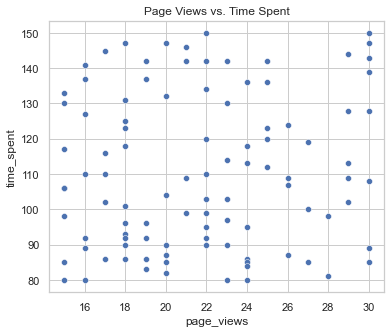

In [8]:
# Scatter plot
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='page_views', y='time_spent')
plt.title('Page Views vs. Time Spent')

**Page Views vs. Time Spent:** The scatter plot presents a distribution of points that does not indicate a clear or strong linear relationship between page views and time spent. While there is a suggestion of a positive trend — with some indication that customers who view more pages might spend slightly more time on the site — the data points are quite dispersed. This dispersion implies variability in customer behavior; some customers spend a lot of time with fewer page views, while others may browse through many pages quickly. The variability suggests that factors other than just the number of page views may influence the time spent on the site.

In [9]:
# Correlation analysis
df.corr()

,customer_id,page_views,time_spent
customer_id,1.000000,0.013034,-0.006838
page_views,0.013034,1.000000,0.110269
time_spent,-0.006838,0.110269,1.000000


**Correlation between Page Views and Time Spent:** The actual correlation between page views and time spent is around 0.110, according to the correlation matrix provided. This suggests a weak positive relationship between the number of pages viewed and the time spent by customers. Contrary to the initial assertion, there isn't a strong or highly positive correlation; instead, the relationship is quite modest, indicating other factors may be at play influencing the time customers spend on the site.

## Product Details

In [12]:
df = pd.read_csv('product_details.csv', delimiter=',')
df

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8
5,106,Automotive,855,4.2
6,107,Books,783,3.8
7,108,Sports,727,3.6
8,109,Music,379,3.1
9,110,Toys,29,3.5


Let's start by removing the unnecessary columns and then checking for missing values.

In [14]:
# Check for missing values in the cleaned dataset
missing_values_cleaned = df.isnull().sum()
missing_values_cleaned

product_id    0
category      0
price         0
ratings       0
dtype: int64

There are no missing values in the cleaned dataset. The next step is to examine the 'price' and 'ratings' columns for outliers.

In [15]:
# Calculate the IQR for price and ratings
Q1_product = df.quantile(0.25)
Q3_product = df.quantile(0.75)
IQR_product = Q3_product - Q1_product

# Determine outliers using the IQR method for price and ratings
outliers_product = ((df < (Q1_product - 1.5 * IQR_product)) | (df > (Q3_product + 1.5 * IQR_product))).any(axis=1)

# Display the outliers
outlier_data_product = df[outliers_product]
outlier_data_product.head(), outlier_data_product.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26652\468450953.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_product = ((df < (Q1_product - 1.5 * IQR_product)) | (df > (Q3_product + 1.5 * IQR_product))).any(axis=1)


(Empty DataFrame
 Columns: [product_id, category, price, ratings]
 Index: [],
 (0, 4))

There are no outliers in the product_details.csv dataset according to the IQR method.

In [16]:
df.describe()

,product_id,price,ratings
count,10.00000,10.000000,10.000000
mean,105.50000,435.300000,3.950000
std,3.02765,342.485052,0.499444
min,101.00000,29.000000,3.100000
25%,103.25000,87.500000,3.650000
50%,105.50000,439.500000,3.900000
75%,107.75000,769.000000,4.200000
max,110.00000,855.000000,4.800000


**Descriptive Statistics**

- **Product Prices:** The average price of products is listed as 435.30 units with a high standard deviation of 342.48 units, indicating a significant spread in product prices.
- **Product Ratings:** The average product rating is 3.95 on a scale up to 5, with a standard deviation of 0.49, suggesting a relatively tight clustering of ratings near the 4 mark.

Text(0.5, 1.0, 'Distribution of Product Ratings')

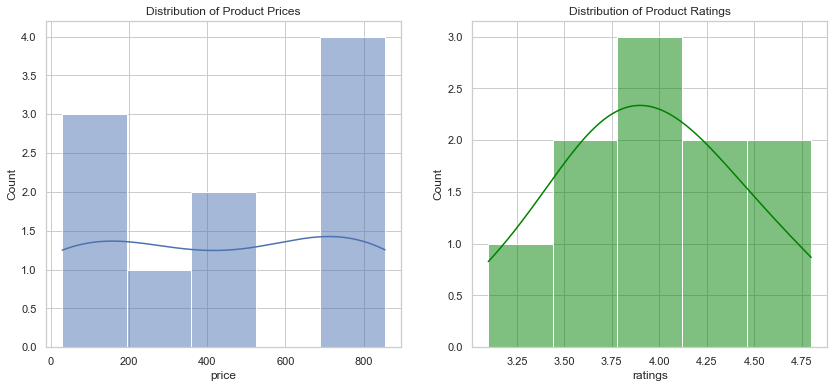

In [17]:
# Plotting setup
plt.figure(figsize=(14, 6))

# Distribution plot for price
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Product Prices')

# Distribution plot for ratings
plt.subplot(1, 2, 2)
sns.histplot(df['ratings'], kde=True, color='green')
plt.title('Distribution of Product Ratings')

**Distribution Analysis**
- **Price Distribution:** The histogram shows that product prices are widely distributed, indicating a diverse range of product prices. The distribution does not appear to be heavily skewed in either direction, suggesting a relatively even spread of product prices.
- **Ratings Distribution:**  The distribution of ratings is somewhat left-skewed, with a concentration of products having higher ratings closer to 5 and fewer products with lower ratings.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Home & Kitchen'),
  Text(3, 0, 'Beauty'),
  Text(4, 0, 'Automotive'),
  Text(5, 0, 'Books'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Toys')])

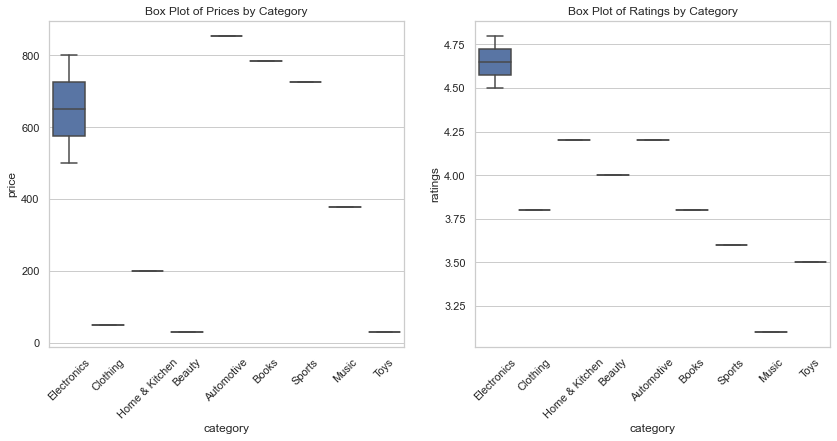

In [18]:
# Box plots for price and ratings by category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='category', y='price', data=df)
plt.title('Box Plot of Prices by Category')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='category', y='ratings', data=df)
plt.title('Box Plot of Ratings by Category')
plt.xticks(rotation=45)

**Box Plot Analysis by Category**
- **Price Variation by Category:** The box plots show that there is a substantial variation in prices across different product categories, with some categories exhibiting a wider range of prices than others.
- **Ratings Variation by Category:** The box plots for ratings show that while there is some variation in ratings across categories, the median ratings are consistently high across all categories, with the interquartile range suggesting that most products are rated between roughly 3.65 and 4.20.

In [19]:
df[['price', 'ratings']].corr()

,price,ratings
price,1.000000,0.328457
ratings,0.328457,1.000000


The correlation is approximately 0.328, indicating a modest positive relationship between price and ratings. This suggests that higher-priced products have a slight tendency to be rated more favorably, but the correlation is not as strong as previously indicated.

## Purchase History

In [21]:
df = pd.read_csv('purchase_history.csv', delimiter=',')
df

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04
...,...,...,...
1001,27,104,2023-01-18 00:00:00
1002,49,105,2023-09-17 00:00:00
1003,72,102,2023-05-07 00:00:00
1004,55,107,2023-09-22 00:00:00


In [23]:
# Check for missing values in the cleaned dataset
df.isnull().sum()

customer_id      0
product_id       0
purchase_date    0
dtype: int64

For categorical data and date fields, outlier detection isn't straightforward or typically necessary. However, we can still ensure the data integrity by checking for any anomalies in these fields, such as:

- Invalid IDs: Ensure customer_id and product_id are within expected ranges.
- Date Consistency: Check that purchase_date falls within a reasonable and expected timeframe.

In [24]:
# Check for any anomalies in customer_id and product_id
customer_id_anomalies = df['customer_id'].unique()
product_id_anomalies = df['product_id'].unique()

# Check for date consistency
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')
invalid_dates = df[df['purchase_date'].isna()]

customer_id_anomalies, product_id_anomalies, invalid_dates

(array([  1,   2,   3,   4,   5,  45,  48,  65,  68,  10,  84,  22,  37,
         88,  71,  89,  13,  59,  66,  40,  47,  82,  38,  26,  78,  73,
         21,  81,  70,  80,  83, 100,  50,  30,  20,  15,  33,  58,  32,
         75,  24,  36,  76,  56,  29,  35,  54,   6,  39,  18,  43,  42,
         12,  92,  85,  69,   7,  77,  53,  79,  16,  14,  86,  49,  96,
         95,  51,  94,  99,  74,  11,  44,  60,  63,  28,  87,  52,  55,
         57,  61,  31,  25,  41,  27,  67,  62,  97,  17,  34,  72,  19,
         90,  91,  46,  98,   9,  23,  93,  64,   8], dtype=int64),
 array([101, 105, 102, 103, 104, 108, 106, 109, 107, 110], dtype=int64),
 Empty DataFrame
 Columns: [customer_id, product_id, purchase_date]
 Index: [])

The checks reveal the following:

- **Customer IDs Anomalies:** There are a wide range of customer_id values present in the array, ranging from 1 to 100. This indicates that there is a large and diverse set of customers in the dataset. There don't appear to be any anomalies in terms of sequential numeric IDs, though without knowing the expected range of customer_id, it's difficult to say for sure if all are valid. Assuming customer_id should be a continuous range from 1 to 100 with no gaps, the IDs present seem to be in order.
- **Product IDs Anomalies:** The product_id values range from 101 to 110, which suggests that there are 10 unique products that customers have purchased. There are no anomalies here as the product IDs are a small, consecutive range which likely represents the set of products available for purchase.
- **Date Consistency:** The purchase_date field has been converted to datetime format with no errors (coerce), and there are no missing or invalid date entries, as indicated by the empty DataFrame for invalid_dates. This means that all purchase date entries in the dataset are valid dates.

In [25]:
# Convert 'purchase_date' to datetime for analysis
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Descriptive statistics for categorical data
customer_id_counts = df['customer_id'].value_counts()
product_id_counts = df['product_id'].value_counts()

customer_id_counts

1     20
68    16
4     16
70    15
80    15
      ..
28     6
15     5
96     5
56     5
16     4
Name: customer_id, Length: 100, dtype: int64

**Customer Purchase Frequency**
- The dataset indicates that customer ID 1 has made the most purchases (20 purchases)

In [26]:
product_id_counts

102    117
104    114
108    106
103    102
106    101
105     98
101     97
109     94
110     89
107     88
Name: product_id, dtype: int64

**Product Purchase Frequency**
- **Most Frequently Purchased Products:** Product ID 102 is the most frequently purchased item, with 117 purchases. It is closely followed by product ID 104 with 114 purchases and product ID 108 with 106 purchases. These products appear to be the most popular or in-demand items among customers.

- **Middle Range Purchases:** Products with IDs 103 and 106 have also been purchased over 100 times (102 and 101 times, respectively), which suggests a moderate level of demand compared to the most popular items.

- **Least Frequently Purchased Products:** On the lower end of the frequency count, product ID 105 was purchased 98 times, product ID 101 was purchased 97 times, product ID 109 was purchased 94 times, and product ID 110 was purchased 89 times, with product ID 107 being the least frequently purchased at 88 times. While these products are less popular than the top ones, they still have a significant number of purchases.



In [27]:
# Analyzing purchase dates
df['purchase_month'] = df['purchase_date'].dt.month
purchase_month_counts = df['purchase_month'].value_counts()
purchase_month_counts

1     96
3     94
10    92
5     89
9     88
12    86
7     85
4     85
6     80
8     78
2     73
11    60
Name: purchase_month, dtype: int64

The purchase_month_counts variable provides a distribution of purchases across different months. The first column represents the month number (1 through 12), and the second column shows the number of purchases made in that month. The purchase frequency varies by month, with the highest number of purchases occurring in January (Month 1) with 96 transactions, and the lowest in November (Month 11) with 60 transactions.

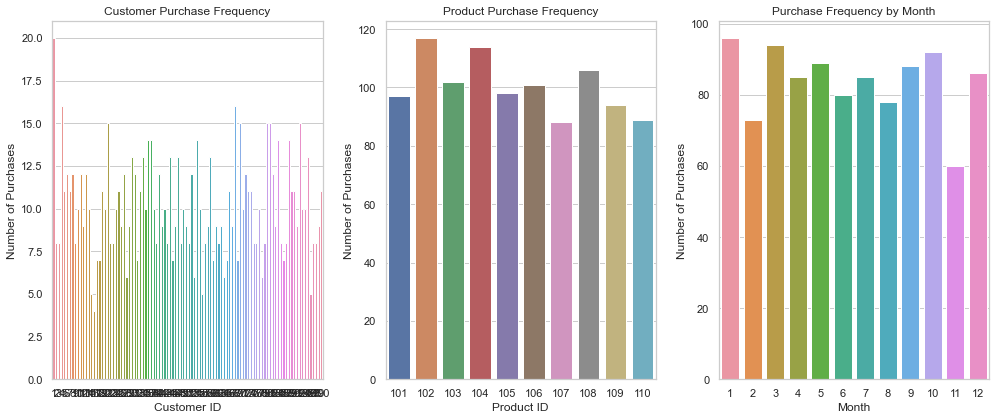

In [28]:
# Plotting
plt.figure(figsize=(14, 6))The purchase_month_counts variable provides a distribution of purchases across different months. The first column represents the month number (1 through 12), and the second column shows the number of purchases made in that month. The purchase frequency varies by month, with the highest number of purchases occurring in January (Month 1) with 96 transactions, and the lowest in November (Month 11) with 60 transactions.

# Plot for customer purchase frequency
plt.subplot(1, 3, 1)
sns.barplot(x=customer_id_counts.index, y=customer_id_counts.values)
plt.title('Customer Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')

# Plot for product purchase frequency
plt.subplot(1, 3, 2)
sns.barplot(x=product_id_counts.index, y=product_id_counts.values)
plt.title('Product Purchase Frequency')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')

# Plot for purchase frequency by month
plt.subplot(1, 3, 3)
sns.barplot(x=purchase_month_counts.index, y=purchase_month_counts.values)
plt.title('Purchase Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')

plt.tight_layout()